# Load librairies

In [136]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data

In [5]:
adcc = pd.read_csv(r'H:\Desktop\00- Projects\Adcc Clustering\Data\adcc_historical_data.csv', sep=';')

# Data exploration

In [6]:
print(adcc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   match_id       1028 non-null   int64 
 1   winner_id      1028 non-null   int64 
 2   winner_name    1028 non-null   object
 3   loser_id       1028 non-null   int64 
 4   loser_name     1028 non-null   object
 5   win_type       1028 non-null   object
 6   submission     400 non-null    object
 7   winner_points  1028 non-null   int64 
 8   loser_points   1028 non-null   int64 
 9   adv_pen        29 non-null     object
 10  weight_class   1028 non-null   object
 11  sex            1028 non-null   object
 12  stage          1028 non-null   object
 13  year           1028 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 112.6+ KB
None


In [7]:
print(adcc.describe())

           match_id     winner_id      loser_id  winner_points  loser_points  \
count   1028.000000   1028.000000   1028.000000    1028.000000   1028.000000   
mean    9190.565175   2487.659533   2944.011673       0.807393     -0.590467   
std    11085.517307   3489.950628   3572.119124       3.123530      0.674033   
min      140.000000     -1.000000     -1.000000      -1.000000     -1.000000   
25%     1173.500000    195.000000     -1.000000      -1.000000     -1.000000   
50%     3304.500000    644.000000    939.000000      -1.000000     -1.000000   
75%    13904.250000   3009.000000   5463.000000       2.000000      0.000000   
max    35103.000000  12922.000000  13095.000000      22.000000      6.000000   

              year  
count  1028.000000  
mean   2010.874514  
std       7.369033  
min    1998.000000  
25%    2005.000000  
50%    2011.000000  
75%    2017.000000  
max    2022.000000  


In [8]:
adcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   match_id       1028 non-null   int64 
 1   winner_id      1028 non-null   int64 
 2   winner_name    1028 non-null   object
 3   loser_id       1028 non-null   int64 
 4   loser_name     1028 non-null   object
 5   win_type       1028 non-null   object
 6   submission     400 non-null    object
 7   winner_points  1028 non-null   int64 
 8   loser_points   1028 non-null   int64 
 9   adv_pen        29 non-null     object
 10  weight_class   1028 non-null   object
 11  sex            1028 non-null   object
 12  stage          1028 non-null   object
 13  year           1028 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 112.6+ KB


In [9]:
adcc.head()

,match_id,winner_id,winner_name,loser_id,loser_name,win_type,submission,winner_points,loser_points,adv_pen,weight_class,sex,stage,year
0,3314,484,Murilo Santana,733,Vinicius Magalhaes,DECISION,NaN,-1,-1,NaN,ABS,M,4F,2011
1,35049,7507,Nicholas Meregali,9554,Henrique Cardoso,SUBMISSION,Kimura,-1,-1,NaN,99KG,M,R1,2022
2,35053,7507,Nicholas Meregali,1740,Yuri Simoes,DECISION,NaN,-1,-1,NaN,99KG,M,4F,2022
3,35057,7507,Nicholas Meregali,576,Rafael Lovato Jr,POINTS,NaN,0,0,PEN,99KG,M,3RD,2022
4,35096,7507,Nicholas Meregali,11797,Giancarlo Bodoni,POINTS,NaN,6,2,NaN,ABS,M,4F,2022


In [10]:
adcc.isnull().sum()

match_id           0
winner_id          0
winner_name        0
loser_id           0
loser_name         0
win_type           0
submission       628
winner_points      0
loser_points       0
adv_pen          999
weight_class       0
sex                0
stage              0
year               0
dtype: int64

We can see that there is a problem with adv_pen because it is only filled when there is a draw on points we will ignore this column

In [11]:
adcc=adcc.drop('adv_pen', axis=1)

In [12]:
adcc.isnull().sum()

match_id           0
winner_id          0
winner_name        0
loser_id           0
loser_name         0
win_type           0
submission       628
winner_points      0
loser_points       0
weight_class       0
sex                0
stage              0
year               0
dtype: int64

We can visualize what are the type of submissions that are most used to win in this dataset

In [13]:
# Erase the NA
adcc_submission = adcc[adcc['submission'] != "N/A"]

# Count each submission
submission_counts = adcc['submission'].value_counts()

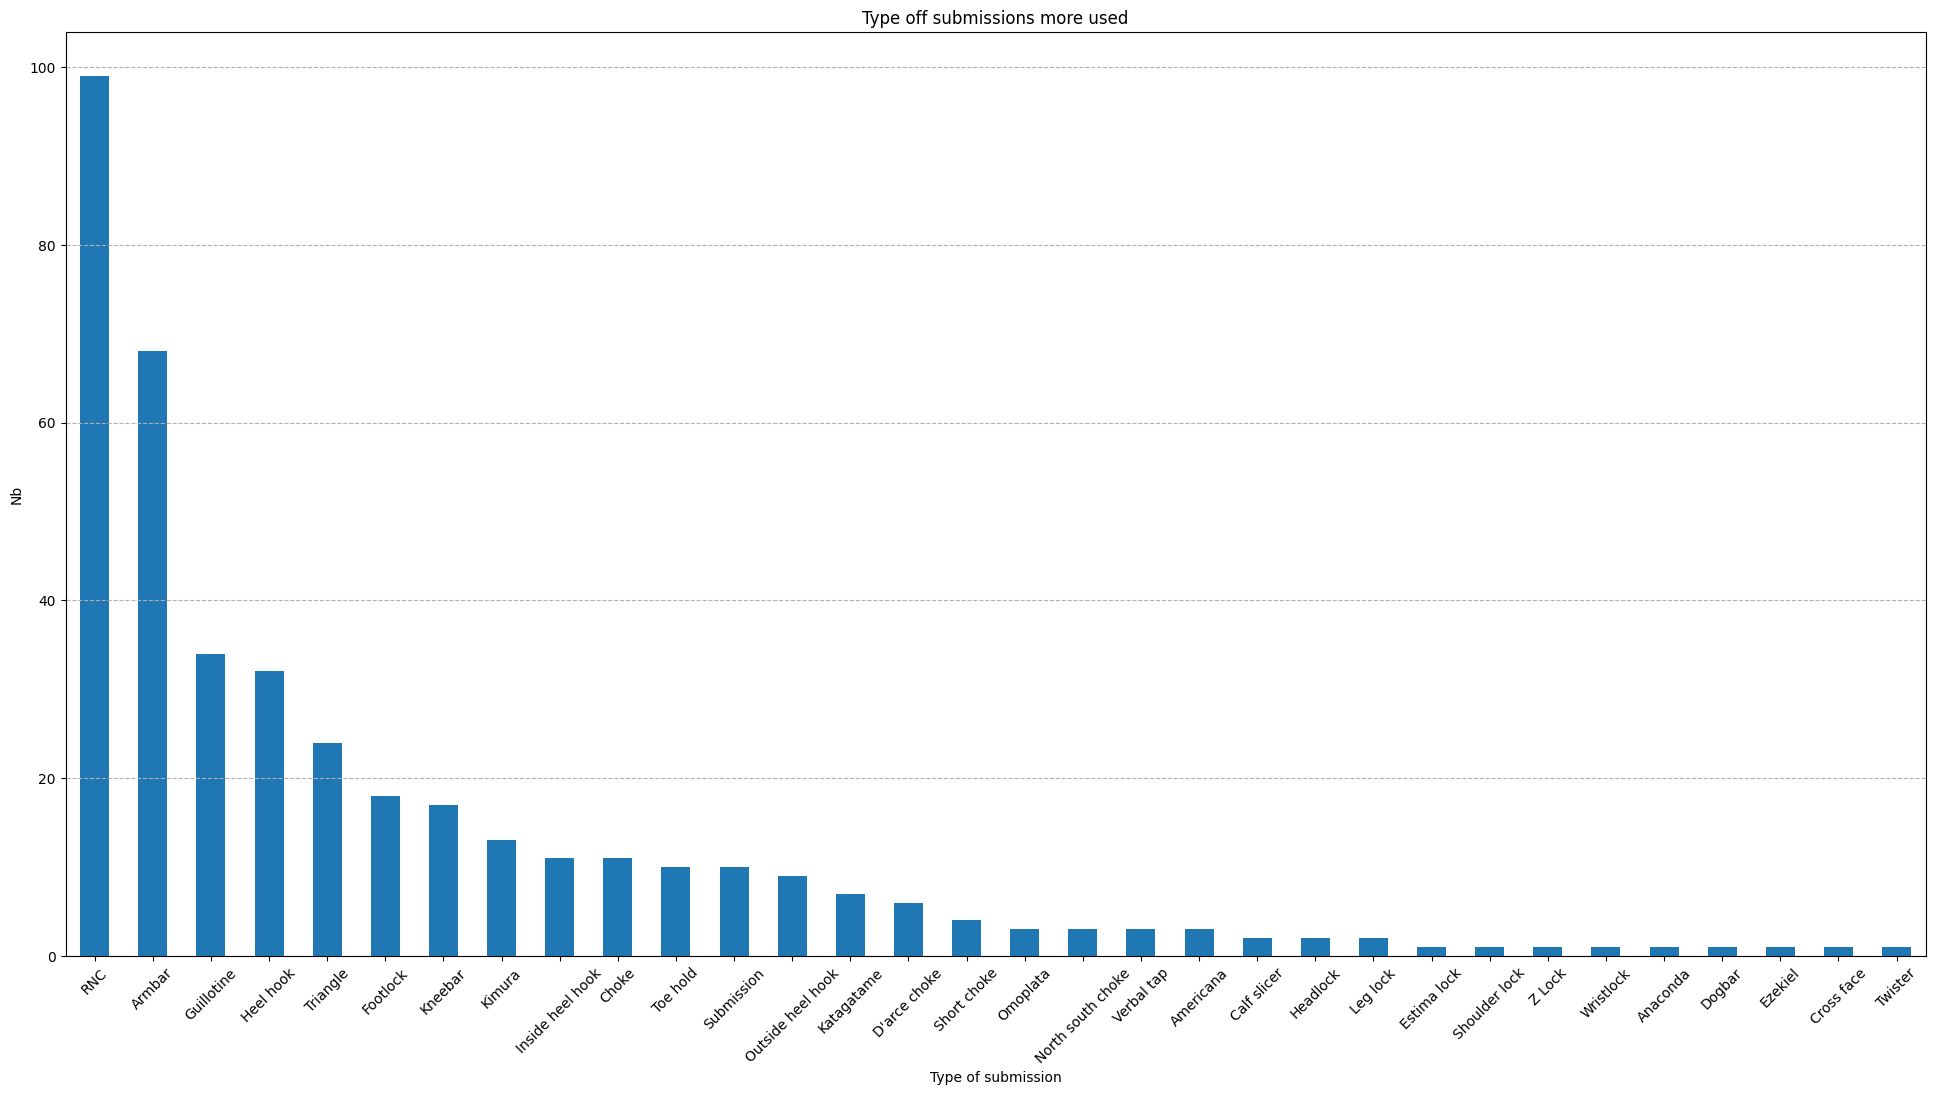

In [14]:
plt.figure(figsize=(24,12))
submission_counts.plot(kind='bar')
plt.title("Type off submissions more used")
plt.xlabel("Type of submission")
plt.ylabel("Nb")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

We can see that the most used submission is Rare Naked Choke this indicates us that it is very important to learn how to get to the back of your opponent 

We can visualize the amount off wins via submission points or decision

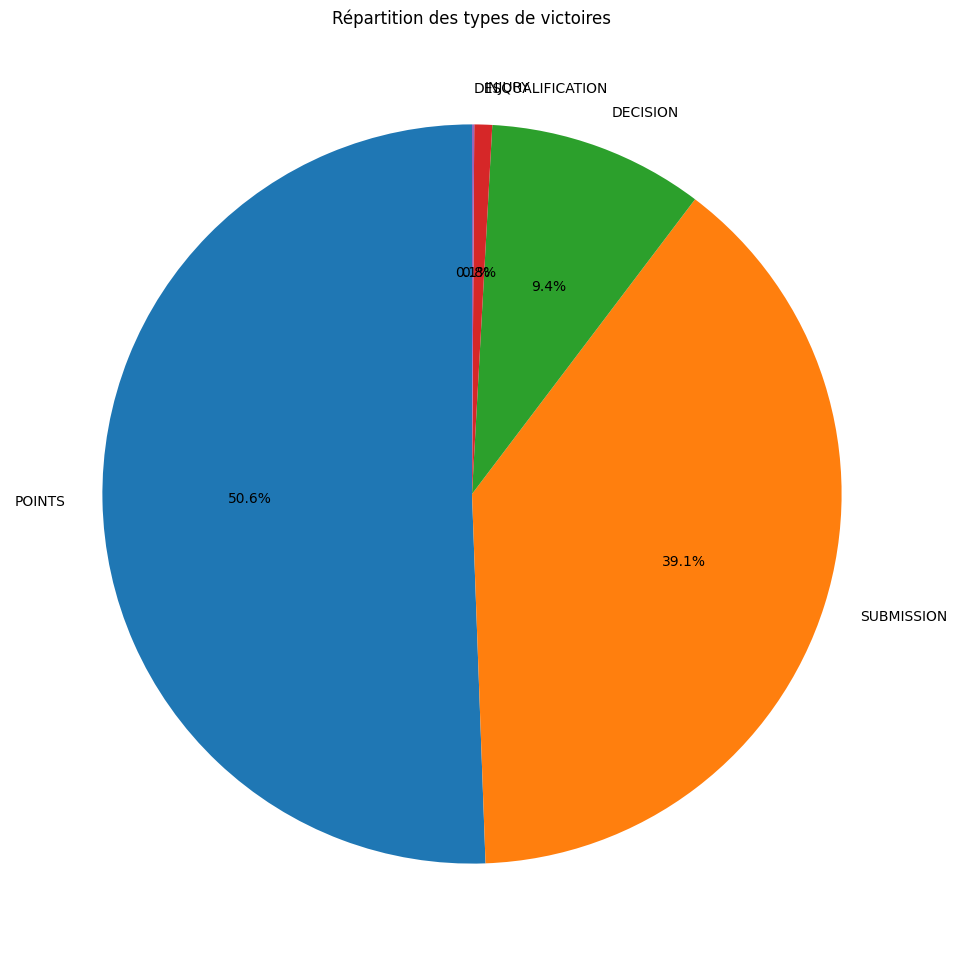

In [15]:
win_type_counts = adcc['win_type'].value_counts()
plt.figure(figsize=(12, 12))
win_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=[0, 0, 0,0,0])
plt.title("Répartition des types de victoires")
plt.ylabel("")
plt.show()

In [16]:
print(win_type_counts)


win_type
POINTS              520
SUBMISSION          402
DECISION             97
INJURY                8
DESQUALIFICATION      1
Name: count, dtype: int64


We can also visualize the athlete with most wins on this dataset

In [31]:
nb_wins_by_name=adcc['winner_name'].value_counts()
top_20_wins=nb_wins_by_name.sort_values(ascending=False).head(20)

In [32]:
print(top_20_wins)

winner_name
Alexandre Ribeiro     30
Marcelo Garcia        27
Saulo Ribeiro         22
Andre Galvao          22
Leonardo Vieira       21
Gordon Ryan           20
Fabricio Werdum       20
Roberto Abreu         20
Pablo Popovitch       19
Vinicius Magalhaes    19
Dean Lister           19
Marcus Almeida        18
Rubens Charles        18
Yuri Simoes           16
Marcio Cruz           15
Ricco Rodriguez       15
Gabrielle Garcia      14
Rafael Lovato Jr      14
Royler Gracie         14
Ricardo Arona         13
Name: count, dtype: int64


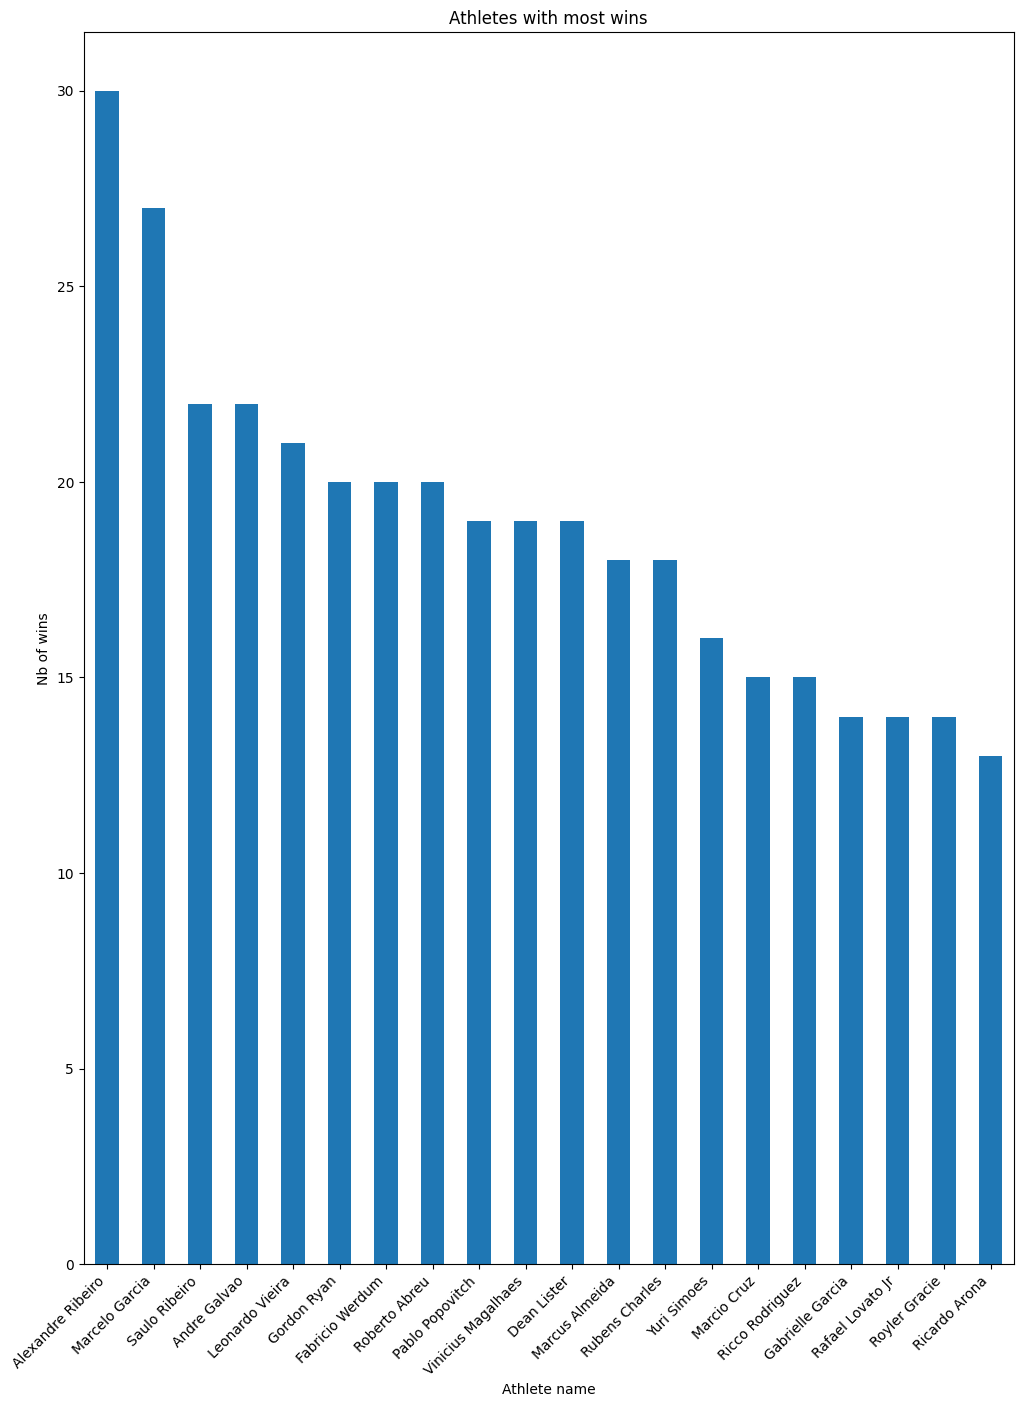

In [33]:
plt.figure(figsize=(12,16))
top_20_wins.plot(kind='bar')
plt.title("Athletes with most wins")
plt.xlabel("Athlete name")
plt.xticks(rotation= 45, ha='right')
plt.ylabel("Nb of wins")
plt.show()


Two Ribeiro's are in the top 3, we should maybe check their instructionals specially for Alexandre Ribeiro

We can also visualize the athletes with most losses

In [35]:
nb_losses_by_name= adcc['loser_name'].value_counts()
worst_20=nb_losses_by_name.sort_values(ascending=False).head(20)

In [36]:
print(worst_20)

loser_name
Alexandre Ribeiro     13
Rafael Lovato Jr      12
Baret Yoshida         11
Vinicius Magalhaes    10
Gary Tonon            10
Dean Lister            9
Leonardo Vieira        9
Roberto Abreu          9
Ricco Rodriguez        9
Romulo Barral          8
A. Cacareco            8
Saulo Ribeiro          8
Ricardo Almeida        7
Marcio Cruz            7
Jared Dopp             7
David Avellan          7
Pablo Popovitch        7
Jeff Monson            7
Lachlan Giles          6
Joao Gabriel Rocha     6
Name: count, dtype: int64


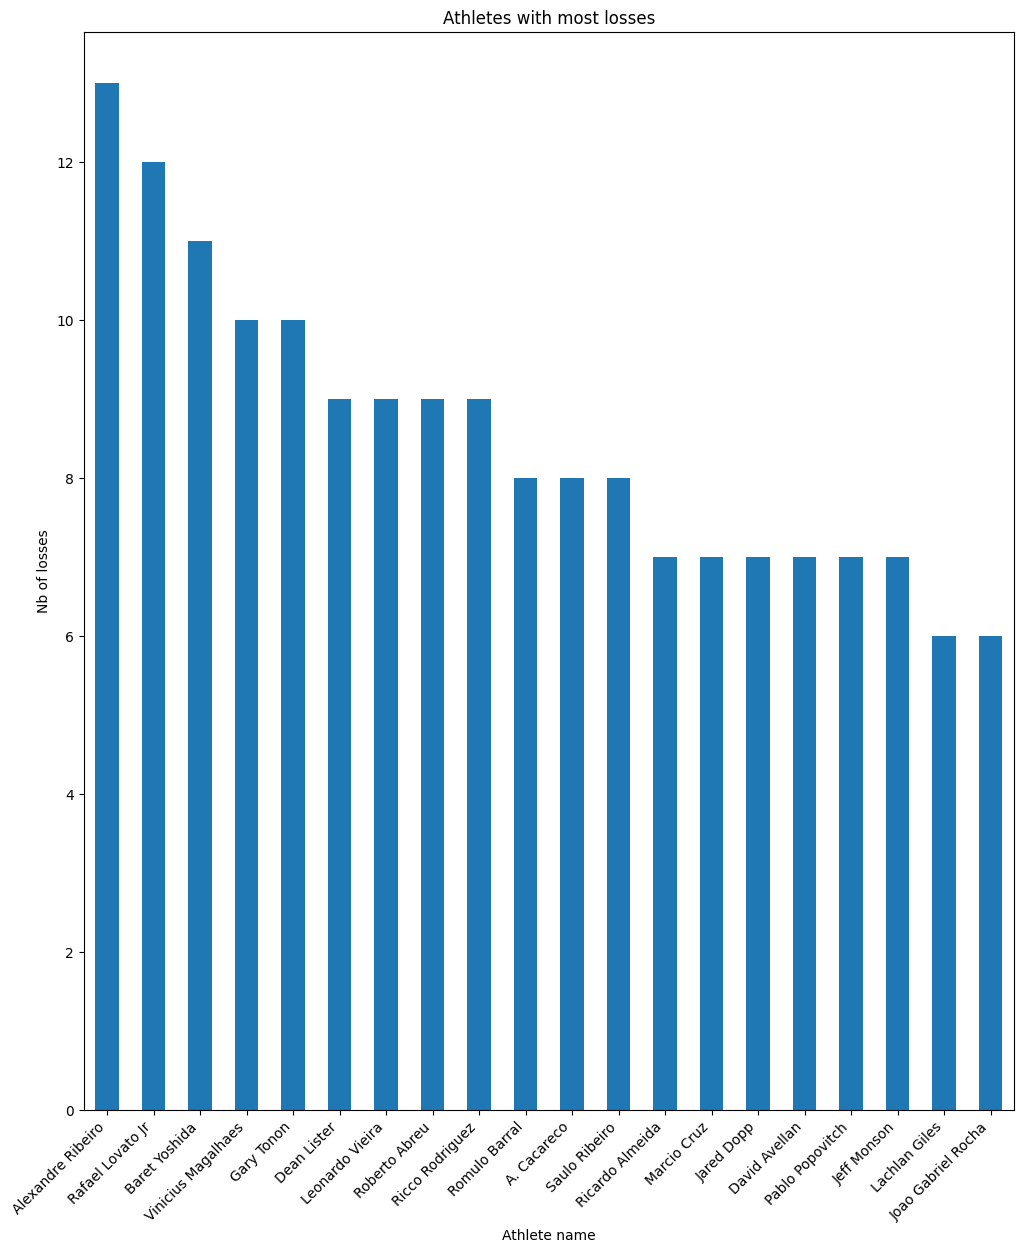

In [42]:
plt.figure(figsize=(12,14))
worst_20.plot(kind="bar")
plt.title("Athletes with most losses")
plt.xlabel("Athlete name")
plt.xticks(rotation=45, ha='right')
plt.ylabel('Nb of losses')
plt.show()

Strangely the athlete with most wins is also the athlete with most losses, this is an example off how important it is to learn from our losses and not let them destroy us

We can also see what is the weight division with most athletes for this dataset

In [47]:
athletes_by_weight=adcc["weight_class"].value_counts()
print(athletes_by_weight)

weight_class
ABS      189
66KG     172
77KG     170
88KG     169
99KG     149
+99KG    137
+60KG     22
60KG      20
Name: count, dtype: int64


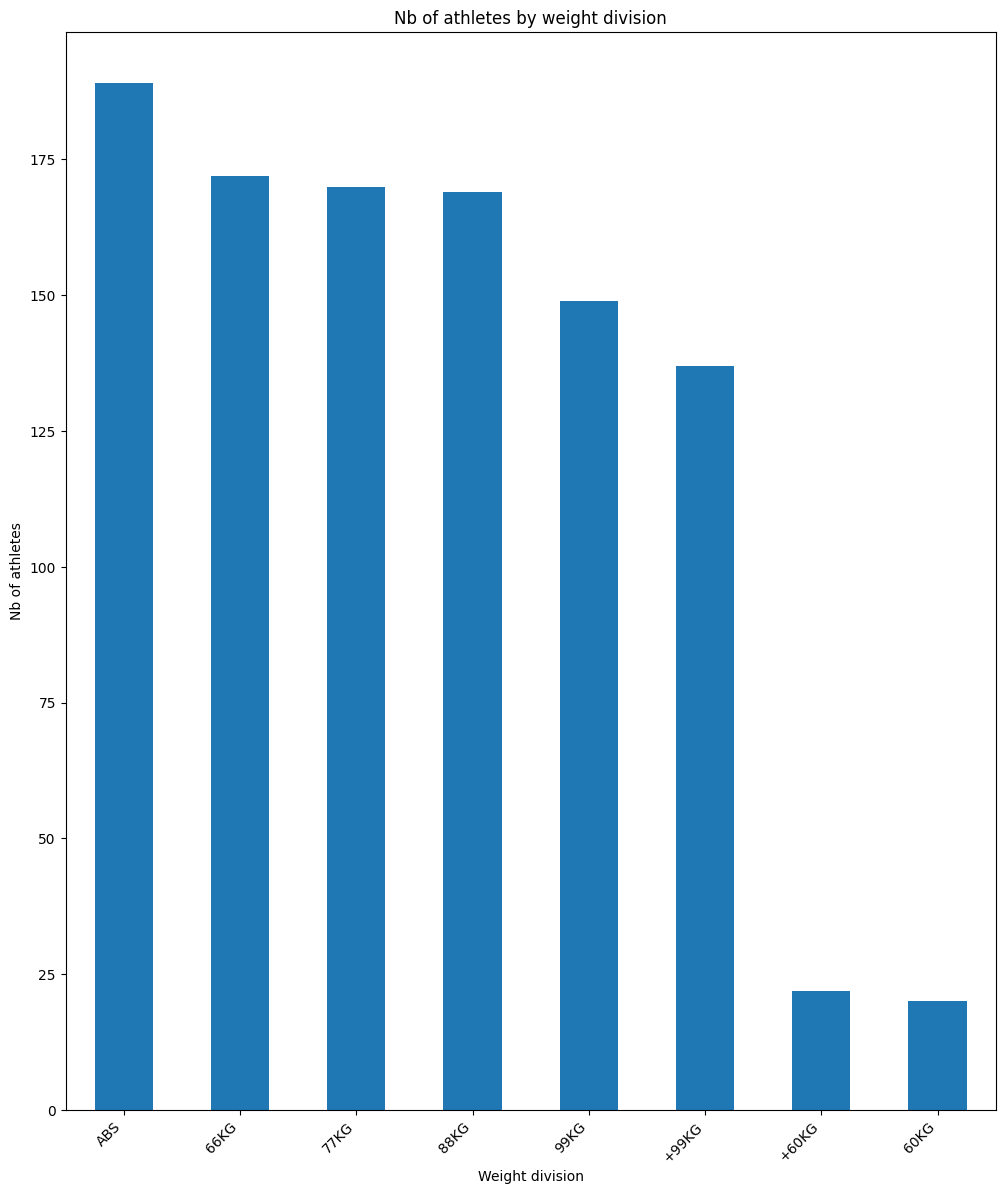

In [48]:
plt.figure(figsize=(12,14))
athletes_by_weight.plot(kind='bar')
plt.xlabel("Weight division")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Nb of athletes")
plt.title("Nb of athletes by weight division")
plt.show()

Obviously the weight division with most athlete is the absolute division with more than 175 athletes from 1998 to 2022

Let's see how the best submission used in the adcc evolved from 1998 to 2022

In [60]:
filtered_data = adcc[adcc['submission'].notna()]

# Group by sub and by year
submission_counts = (
    filtered_data
    .groupby(['year', 'submission'])
    .size()
    .reset_index(name='count')
)

# Identifie the most used sub by year
best_submissions_by_year = (
    submission_counts
    .sort_values(by=['year', 'count'], ascending=[True, False])
    .drop_duplicates(subset=['year'])
    .sort_values(by='year')
)

In [56]:
print(submission_counts.head())


   year  submission  count
0  1998      Armbar      5
1  1998       Choke      3
2  1998    Footlock      1
3  1998  Guillotine      1
4  1998    Headlock      1


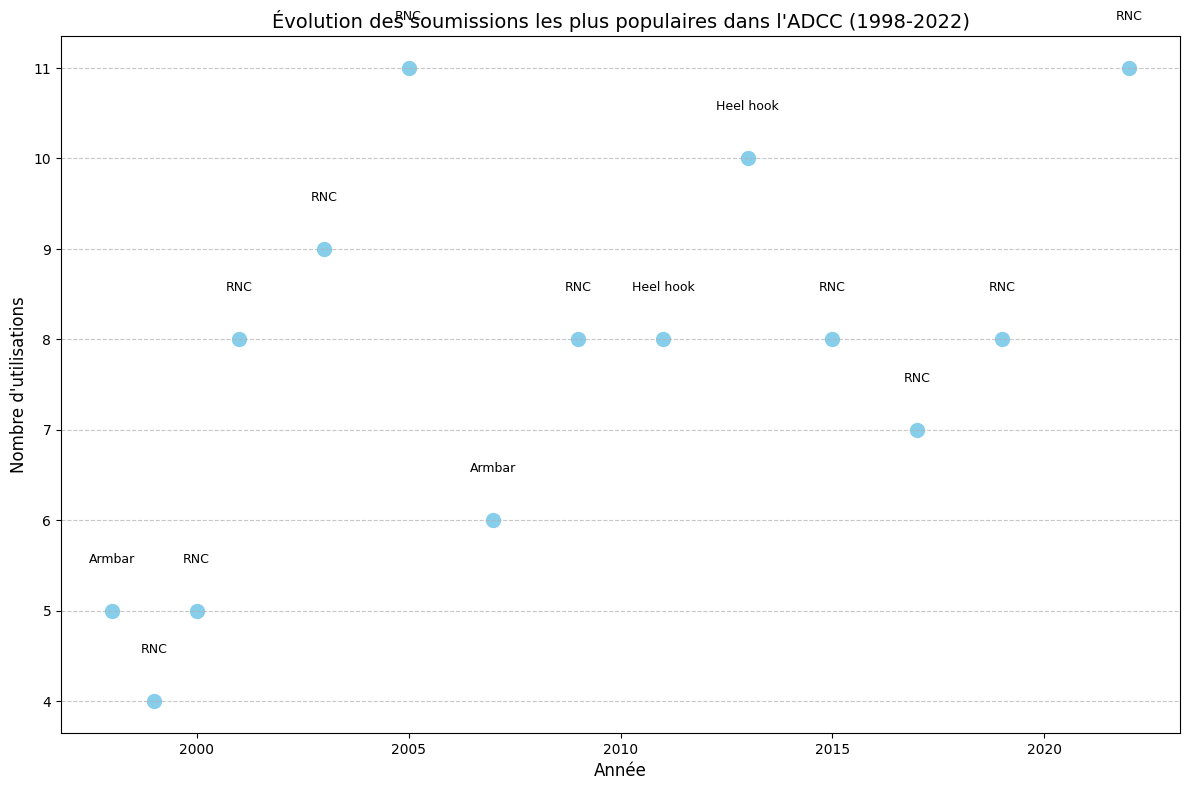

In [55]:
plt.figure(figsize=(12, 8))
plt.scatter(best_submissions_by_year['year'], best_submissions_by_year['count'], color='skyblue', s=100)

# Annotate every point by the sub 
for i, row in best_submissions_by_year.iterrows():
    plt.text(
        row['year'], row['count'] + 0.5,  # Position légèrement au-dessus du point
        row['submission'], fontsize=9, ha='center', va='bottom'
    )

plt.title("Évolution des soumissions les plus populaires dans l'ADCC (1998-2022)", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'utilisations", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [61]:
adcc.head()

,match_id,winner_id,winner_name,loser_id,loser_name,win_type,submission,winner_points,loser_points,weight_class,sex,stage,year
0,3314,484,Murilo Santana,733,Vinicius Magalhaes,DECISION,NaN,-1,-1,ABS,M,4F,2011
1,35049,7507,Nicholas Meregali,9554,Henrique Cardoso,SUBMISSION,Kimura,-1,-1,99KG,M,R1,2022
2,35053,7507,Nicholas Meregali,1740,Yuri Simoes,DECISION,NaN,-1,-1,99KG,M,4F,2022
3,35057,7507,Nicholas Meregali,576,Rafael Lovato Jr,POINTS,NaN,0,0,99KG,M,3RD,2022
4,35096,7507,Nicholas Meregali,11797,Giancarlo Bodoni,POINTS,NaN,6,2,ABS,M,4F,2022


## Clustering off the athletes to see if they are more finishers, euqilibrated or strategical (by decision)

### Prepare the dataset for the clustering

In [64]:
clust_adcc= adcc[['winner_name','win_type']]
print(clust_adcc)

            winner_name    win_type
0        Murilo Santana    DECISION
1     Nicholas Meregali  SUBMISSION
2     Nicholas Meregali    DECISION
3     Nicholas Meregali      POINTS
4     Nicholas Meregali      POINTS
...                 ...         ...
1023     Hayato Sakurai  SUBMISSION
1024        A. Cacareco  SUBMISSION
1025        Jeff Monson      POINTS
1026   Beatriz Mesquita      POINTS
1027        Jeff Monson      POINTS

[1028 rows x 2 columns]


In [66]:
groupedclust= clust_adcc.groupby(['winner_name','win_type']).size().reset_index(name='count')
print(groupedclust)

       winner_name    win_type  count
0      A. Cacareco      POINTS      2
1      A. Cacareco  SUBMISSION      3
2       AJ Agazarm    DECISION      2
3       AJ Agazarm      POINTS      2
4    Aaron Johnson  SUBMISSION      1
..             ...         ...    ...
344  Vitor Ribeiro  SUBMISSION      1
345    Vitor Viana  SUBMISSION      1
346    Yuri Simoes    DECISION      4
347    Yuri Simoes      POINTS     10
348    Yuri Simoes  SUBMISSION      2

[349 rows x 3 columns]


Pivotate the table to facilitate the use for the cluster

In [68]:
pivoted= groupedclust.pivot(index='winner_name', columns='win_type', values='count')

Fill the NA with 0

In [69]:
pivoted = pivoted.fillna(0)

In [70]:
print(pivoted)

win_type               DECISION  DESQUALIFICATION  INJURY  POINTS  SUBMISSION
winner_name                                                                  
A. Cacareco                 0.0               0.0     0.0     2.0         3.0
AJ Agazarm                  2.0               0.0     0.0     2.0         0.0
Aaron Johnson               0.0               0.0     0.0     0.0         1.0
Abdurakhman Bilarov         0.0               0.0     0.0     1.0         0.0
Abraham Marte Messina       0.0               0.0     0.0     0.0         1.0
...                         ...               ...     ...     ...         ...
Vinicius Magalhaes          0.0               0.0     0.0     8.0        11.0
Vitor Belfort               0.0               0.0     0.0     1.0         0.0
Vitor Ribeiro               0.0               0.0     0.0     3.0         1.0
Vitor Viana                 0.0               0.0     0.0     0.0         1.0
Yuri Simoes                 4.0               0.0     0.0    10.

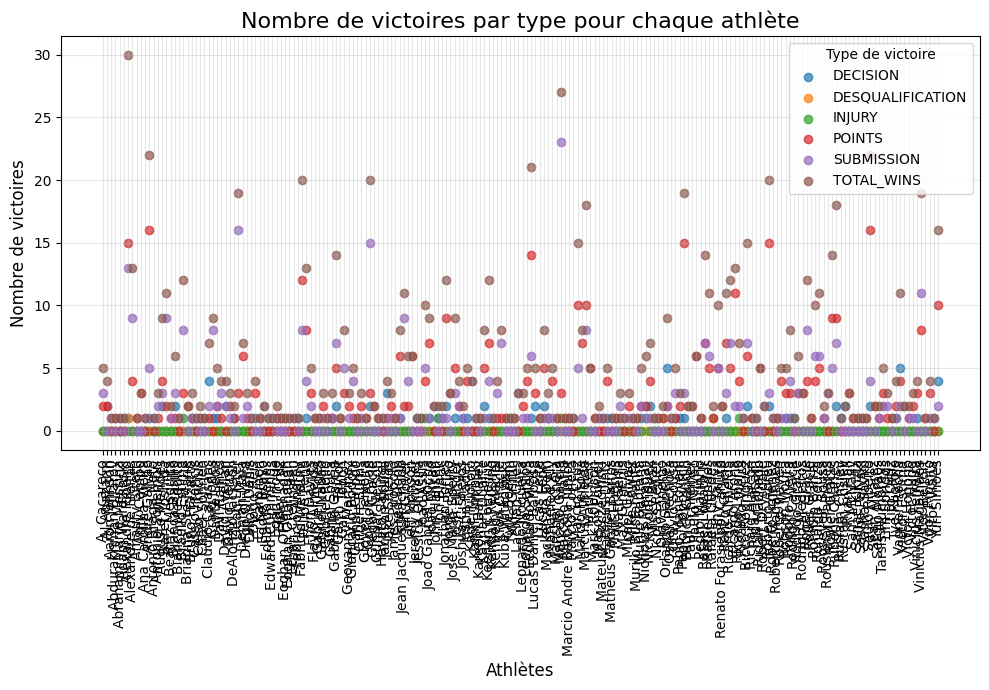

In [83]:
plt.figure(figsize=(10, 7))

# Plot every type of victory
for win_type in pivoted.columns:
    plt.scatter(
        pivoted.index,  # Athlete names
        pivoted[win_type],  # Nb victories per type
        label=win_type,  # Label to differnciate the type of win
        alpha=0.7  # Transparency
    )

plt.xticks(rotation=90)  
plt.title("Nombre de victoires par type pour chaque athlète", fontsize=16)
plt.xlabel("Athlètes", fontsize=12)
plt.ylabel("Nombre de victoires", fontsize=12)
plt.legend(title="Type de victoire")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


It is very complicated to understand this graph, let's try plotting one for each category

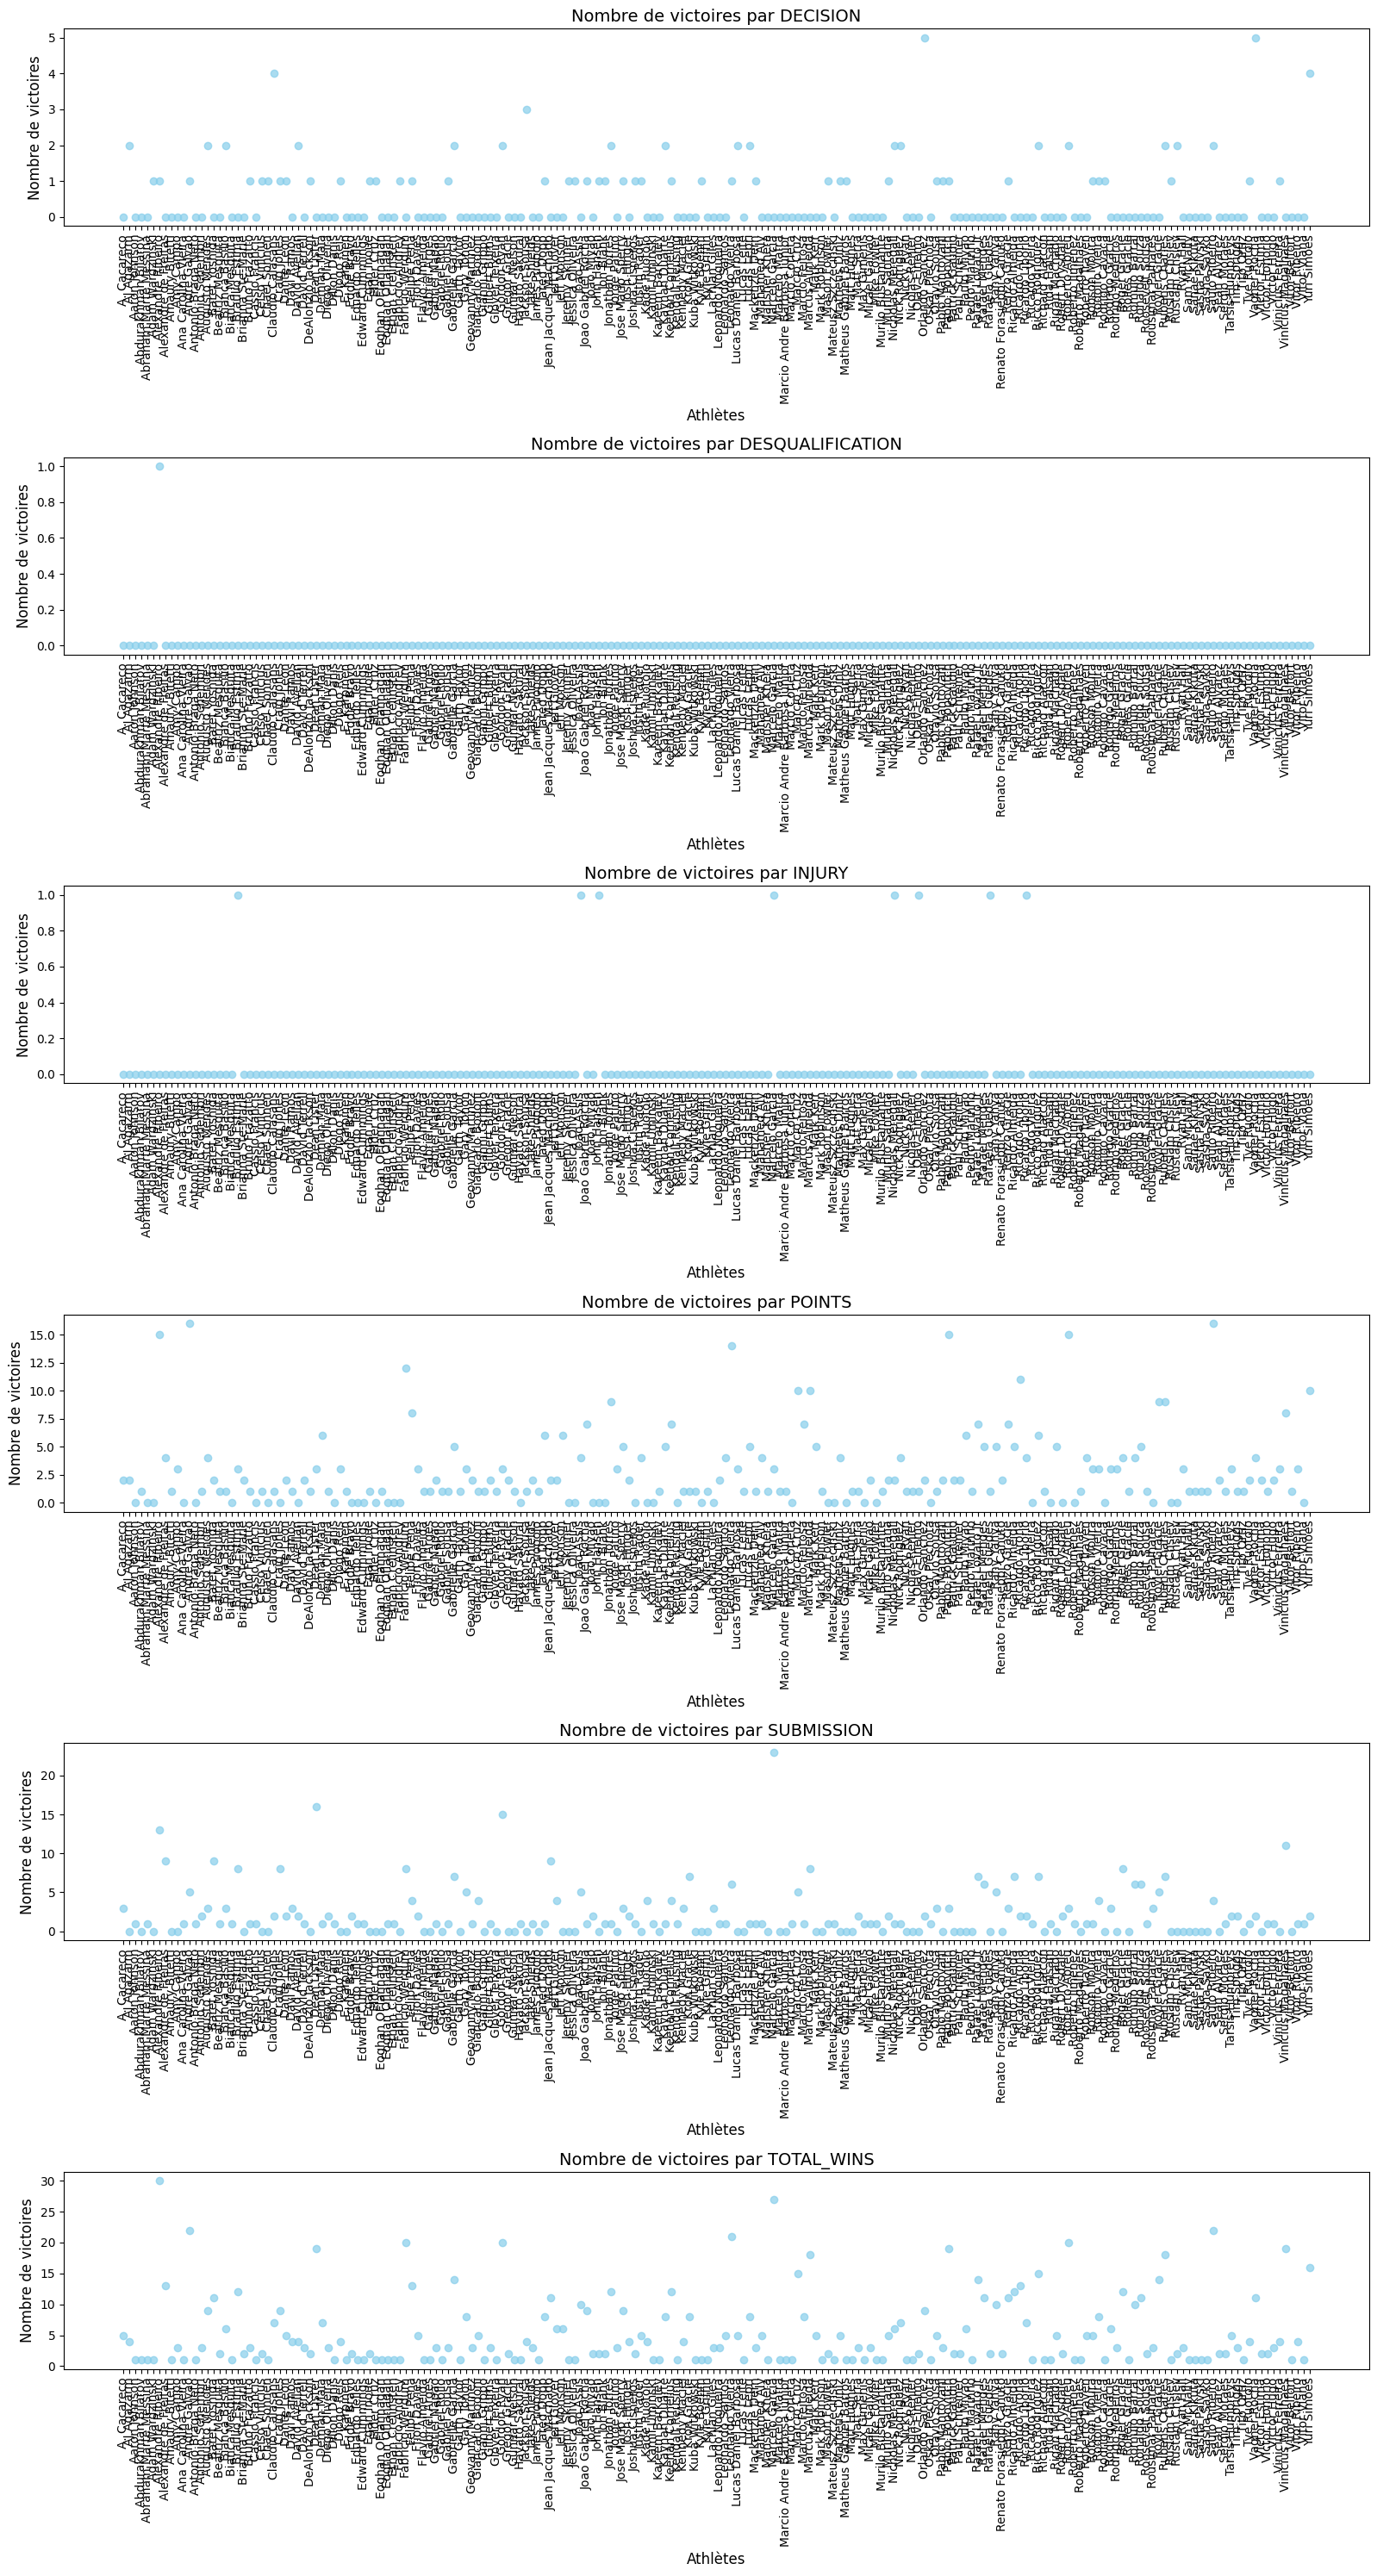

In [84]:
# Create a figure with as much graphics as types of victory
fig, axes = plt.subplots(len(pivoted.columns), 1, figsize=(16, 30))  

# A visualization for each type of victory 
for i, win_type in enumerate(pivoted.columns):
    axes[i].scatter(pivoted.index, pivoted[win_type], alpha=0.7, color='skyblue')
    axes[i].set_title(f"Nombre de victoires par {win_type}", fontsize=14)
    axes[i].set_xlabel("Athlètes", fontsize=12)
    axes[i].set_ylabel("Nombre de victoires", fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)  # Incliner les noms des athlètes

# Adjust the spaces between the vizualisations
plt.tight_layout()
plt.show()


We can see that for disqualification and injury there is a lot of 0, we might consider erasing these columns

In [92]:
# Calculate the variance for each colulmn
variances = pivoted.var()

# IIdentify those with a low variance
low_variance_cols = variances[variances < 0.04].index

# Erase these columns from our dataset
pivoted_cleaned = pivoted.drop(columns=low_variance_cols)

print(f"Columns erased because of a low variability : {list(low_variance_cols)}")


Columns erased because of a low variability : ['DESQUALIFICATION', 'INJURY']


In [93]:
pivoted_cleaned= pivoted_cleaned.drop('TOTAL_WINS',axis= 1)

In [101]:
pivoted_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, A. Cacareco to Yuri Simoes
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DECISION    198 non-null    float64
 1   POINTS      198 non-null    float64
 2   SUBMISSION  198 non-null    float64
dtypes: float64(3)
memory usage: 14.3+ KB


We have seen on the vizualisations that there are some athletes with a lot of wins via submission or decision, let's standarsize

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(pivoted_cleaned)
standardized_adcc = pd.DataFrame(data_standardized, columns=pivoted_cleaned.columns, index=pivoted_cleaned.index)

Let's verify that the standardization have been done correctly

In [108]:
print(standardized_adcc.describe())

win_type      DECISION        POINTS    SUBMISSION
count     1.980000e+02  1.980000e+02  1.980000e+02
mean     -4.934325e-17 -2.691450e-17  1.794300e-17
std       1.002535e+00  1.002535e+00  1.002535e+00
min      -5.564338e-01 -7.943422e-01 -6.394888e-01
25%      -5.564338e-01 -4.918812e-01 -6.394888e-01
50%      -5.564338e-01 -4.918812e-01 -3.245167e-01
75%       5.793796e-01  1.130410e-01 -9.544610e-03
max       5.122633e+00  4.045035e+00  6.604870e+00


Let's now begin the clustering, we will use the K-means algorithm

In [127]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(standardized_adcc)
clusters= kmeans.labels_


C:\Users\CYTech Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


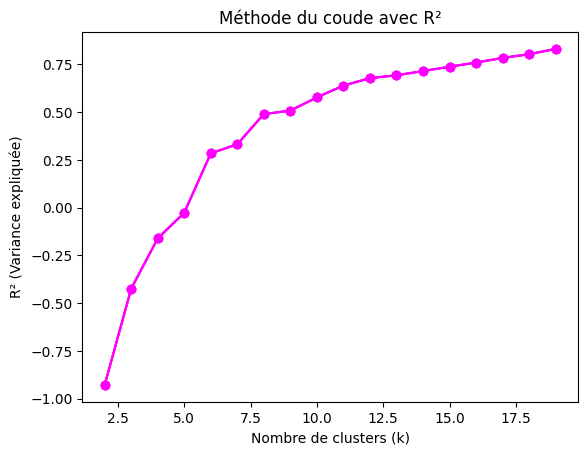

In [ ]:
tss = np.sum((standardized_adcc - standardized_adcc.mean())**2)
wcss = []
r2 = []
for k in range(2, 20): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_adcc)
    wcss.append(kmeans.inertia_)  # Stocker WCSS
    r2.append(1 - wcss[-1] / tss)  # Calculer R^2
plt.plot(range(2, 20), r2, marker='o', color='magenta')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("R² (Variance expliquée)")
plt.title("Méthode du coude avec R²")
plt.show()



In [126]:
from sklearn.metrics import silhouette_score
score = silhouette_score(standardized_adcc, kmeans.labels_)
print(f"Silhouette Score : {score}")


Silhouette Score : 0.5483619115466207


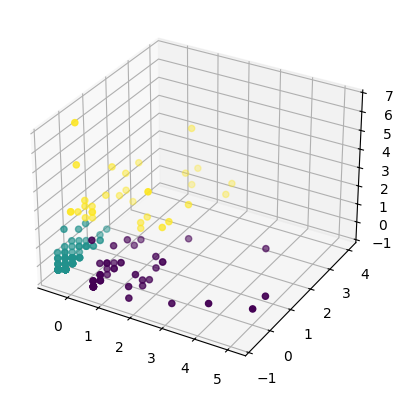

In [128]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(standardized_adcc['DECISION'], standardized_adcc['POINTS'], standardized_adcc['SUBMISSION'], c=clusters, cmap='viridis')
